# Importing dataset

In [ ]:
import zipfile
import os

In [ ]:
local_zip = '/content/datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [ ]:
os.chdir('/content/dataset')
base_url = '/content/dataset'

# Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255., 
                             rotation_range = 40, 
                             horizontal_flip = True, 
                             validation_split=0.3,
                             fill_mode = 'nearest')

# train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, horizontal_flip = True, validation_split=0.3)
# validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = datagen.flow_from_directory(
        base_url,
        classes = ['Ayam Penyet Rumahan', 'Gulai Kambing','Nasi Bakar Ayam', 'Oseng tempe buncis', 'Perkedel Tempe' ,'Tahu Bulat', 'Udang saos padang'],
        target_size=(128, 128),
        subset='training',
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        base_url,
        classes = ['Ayam Penyet Rumahan','Gulai Kambing', 'Nasi Bakar Ayam', 'Oseng tempe buncis', 'Perkedel Tempe' ,'Tahu Bulat', 'Udang saos padang'],
        target_size=(128, 128),
        subset='validation',
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 204 images belonging to 7 classes.
Found 86 images belonging to 7 classes.


# MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers 
import tensorflow as tf 

base_model = MobileNet(input_shape = (128, 128, 3),
include_top = False,
weights = 'imagenet')

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.1)(x)


x = layers.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
7/7 [==============================] - 15s 403ms/step - loss: 3.4454 - acc: 0.3431 - val_loss: 2.5746 - val_acc: 0.3488
Epoch 2/10
7/7 [==============================] - 2s 288ms/step - loss: 1.4158 - acc: 0.5980 - val_loss: 1.2421 - val_acc: 0.5814
Epoch 3/10
7/7 [==============================] - 2s 312ms/step - loss: 0.3566 - acc: 0.8725 - val_loss: 1.3082 - val_acc: 0.5698
Epoch 4/10
7/7 [==============================] - 2s 289ms/step - loss: 0.3301 - acc: 0.8676 - val_loss: 1.1797 - val_acc: 0.6163
Epoch 5/10
7/7 [==============================] - 2s 291ms/step - loss: 0.3016 - acc: 0.8971 - val_loss: 1.1994 - val_acc: 0.6628
Epoch 6/10
7/7 [==============================] - 2s 312ms/step - loss: 0.1699 - acc: 0.9265 - val_loss: 0.9409 - val_acc: 0.6860
Epoch 7/10
7/7 [==============================] - 2s 295ms/step - loss: 0.1838 - acc: 0.9167 - val_loss: 0.8387 - val_acc: 0.7442
Epoch 8/10
7/7 [==============================] - 2s 288ms/step - loss: 0.0822 - acc: 0.9

In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 1s 184ms/step - loss: 1.1845 - acc: 0.6628


[1.1844903230667114, 0.6627907156944275]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

3/3 [==============================] - 1s 180ms/step


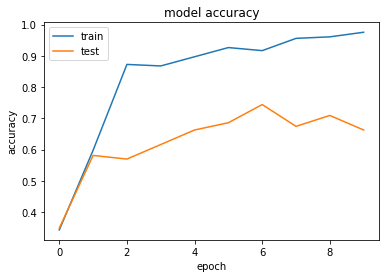

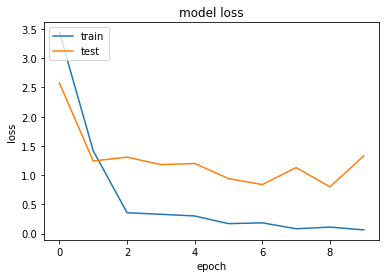

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 021_f7f25926.jpg to 021_f7f25926.jpg
[1.5317305e-04 5.2732038e-03 2.1289126e-04 9.6687302e-02 8.3182472e-01
 5.6735963e-02 9.1127083e-03]
Perkedel Tempe


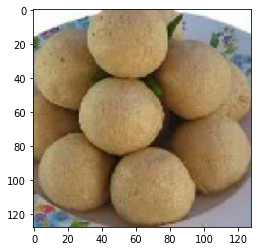

In [ ]:
label = ['Ayam Penyet Rumahan',
'Gulai Kambing',
'Ayam Geprek',
'Oseng tempe buncis',
'Perkedel Tempe',
'Tahu Bulat',
'Udang saos padang']

%matplotlib inline
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/dataset/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(label[np.argmax(classes[0])])

# TFLite

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

tf.saved_model.save(model, RPS_SAVED_MODEL)

loaded = tf.saved_model.load(RPS_SAVED_MODEL)

print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

INFO:tensorflow:Assets written to: rps_saved_model/assets
['serving_default']
((), {'input_1': TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_1')})
{'dense_1': TensorSpec(shape=(None, 7), dtype=tf.float32, name='dense_1')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>